K- Means Clustering 

K - Means Clustering is a type of partioning based clustering technique which separates the given dataset into k number of clusters. It is an iterative algorithm that divides data points into k clusters in such a way that each data points belong to only one cluster. For example, if k = 4 that means the dataset is divided into four clusters. 

In other words, the K - means algorithm identifies k number of centroids and then allocates each data points to the nearest cluster by calculating euclidean distance between centriod and each data points. Here, the 'means' refers to the averaging of data points of  a particular cluster to find the centriod. 


Working of K - Means Algorithm 

1. Determine the number of clusters k.
2. Initialize the cluster centriods with any initialization methods.
3. Compute distance between each point and each cluster centriods(Euclidean distance is most popular to calculate the distance). 
4. Assign each point to that cluster to which the distance between the cluster centroid and data point is minimum.
5. Compute the new cluster centriods for each cluster by taking mean of all data points belonging to that particular cluster. 
6. Repeat step 3 - 5 until there is no change in the cluster centriods. 


#### Working of K - means from scratch

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the Iris dataset
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Extract features from the data 
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

In [10]:
# Drop null values 
data = data.dropna(subset = features)

In [13]:
df = data[features].copy()
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Initialize random centriods 

In [21]:
# Define function for initialize centroids
def random_centroids(data,k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

centroids = random_centroids(df, 3)
centroids

,0,1,2
SepalLengthCm,5.1,5.8,5.6
SepalWidthCm,3.2,3.1,4.1
PetalLengthCm,1.4,4.4,6.6
PetalWidthCm,0.1,0.2,1.0


In [29]:
# Define get_labels function that returns distance of each points from the centroids
def get_labels(data, centroids):
    distances = centroids.apply(lambda x : np.sqrt(((df - x)**2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [31]:
labels = get_labels(data, centroids)
labels.value_counts()

1    70
0    50
2    30
dtype: int64

There are total 150 data points and after calcualation of distance from data points from the centroids, the three clusters are created. The first cluster contains 50 data points, second cluster has 70 and third cluster has 30 points. 

In [36]:
def new_centroids(data, labels, k):
    return df.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T


In [43]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components = 2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f"Iteration{iteration}")
    plt.scatter(x = data_2d[:,0], y = data_2d[:, 1], c = labels)
    plt.scatter(x = centroids_2d[:, 0], y = centroids_2d[:, 1])
    plt.show()

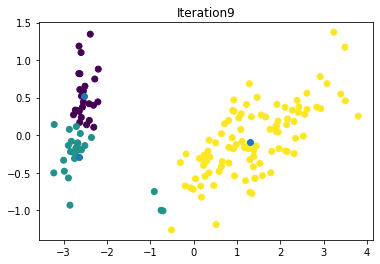

In [47]:
max_iterations = 100
k = 3
centroids = random_centroids(df, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(df, centroids)
    centroids = new_centroids(df, labels, k)
    plot_clusters(df, labels, centroids, iteration)
    iteration += 1

After 9 iterations the clusters stop changing and we get the optimum cluaters.

In [48]:
centroids

,0,1,2
SepalLengthCm,5.250568,4.741119,6.270029
SepalWidthCm,3.660476,3.019562,2.867934
PetalLengthCm,1.496296,1.545116,4.898764
PetalWidthCm,0.266946,0.221667,1.645134


#### KMeans Clustering using sklearn

1. Import libraries


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
# Load the data 
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
x = iris.iloc[:, [1,2,3,4]].values

3. K-Means Clustering 

Find the optimum number of clusters k 

In [52]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

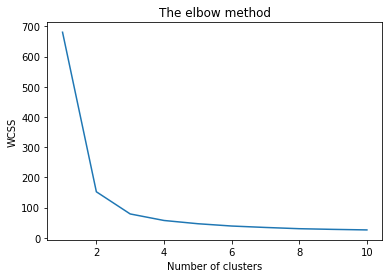

In [53]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From elbow method, we choose the number of clusters to be formed is 3. We use k = 3 in Kmeans.

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

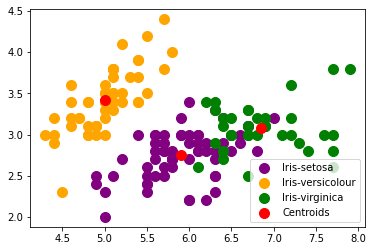

In [55]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()